**Square Root Diffusion**
We consider the following model due to Cox-Ross-Rubinstein
$$dx = a(b-x)dt +\sigma \sqrt{x}dw$$
First we consider the Euler method, approximating $x$ by its first order derivatives. 
$$x_{t+\Delta t} = a(b-x^+_t)\cdot \Delta t + \sigma \cdot  \sqrt{x^+_t} \cdot \sqrt{\Delta t} \cdot z $$
where $x^+_t$ is max $(0, x^+_t)$. I guess we need to take is because 
this diffusion process has reversoin properties.

In [20]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

############# Euler method for Square Root diffusion ##########

def srd(x0, a,b,sigma, T,M, num_of_iter):
    
    ''' 
    parameters
    ==========
    x0: initial value 
    
    a: reversion coeff
    
    b: long term mean
    
    M: number of subintervals
    
    '''
    dt = float(T)/M
    
    x = np.zeros((M+1, num_of_iter))
    x[0] = x0 
    
    for t in range(1, M+1):
        x[t] = x[t-1] + a*(b-np.maximum(x[t-1], 0))*dt \
               +sigma*np.sqrt(np.maximum(x[t-1],0))*np.sqrt(dt)\
               *npr.standard_normal(num_of_iter)
    
    #since square root diffusion has reversoin property, 
    # we only take positive values
    
    x1 = np.maximum(x, 0)
    
    return x1
    
    

In [25]:
x0 = 0.05
a = 3
b = 0.02
sigma = 0.1
T = 5
M = 50
num_of_iter = 50

x = srd(x0, a,b,sigma, T,M, num_of_iter)

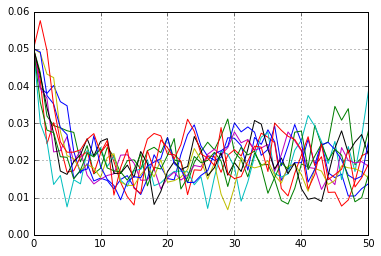

In [28]:
# Here we plot the first 10 simulation, note that
#when the value is approximating 0, it will move back
#moreover, when t is large the value is very close to b
plt.plot(x[:, :10])
plt.grid(True)

**Heston volitility model**
A good property of square root diffusion model is that the 
value will not be negative. So we can use it to model the volitility,
$$dS_t = \mu S_t dt + \sqrt{v_t}S_tdZ_t^1$$
$$dv_t = a(b-v_t)dt + \sqrt{v_t}\sigma_v dZ_t^2$$
$$dZ^1_t dZ_t^2 = \rho$$

To use Monte Carlo method, the crucial point is we need to generate 
two standard normal random with corelation equal to $\rho$.
To achieve this, we first generate two independent $x_1$ and $x_2$
then let 
$$ Z_1 = x_1$$ and 
$$ Z_2 = \rho x_1 + \sqrt{1-\rho ^2} x_2$$
It's easy to see $cor(Z_1, Z_2) = \rho.$
A more generla method is using Cholesky decompostion of the matrix
$$
\left(\begin{array}{cc} 
1 & \rho\\
\rho & 1
\end{array}\right)
$$
we get the lower triangle 
$$
L=\left(\begin{array}{cc} 
1 & 0\\
\rho & \sqrt{1-\rho ^2}
\end{array}\right)
$$

In [8]:
import numpy as np

x = np.zeros((3,10))
x2 = np.zeros_like(x)
x[0] = 1
print x


[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [15]:
a= np.array([1,2,3,4])
a = np.maximum(a, 3)
a

array([3, 3, 3, 4])